In [6]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import re
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [7]:
data= pd.read_csv("/gdrive/My Drive/Project_Dataset/zomato.csv")

In [8]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

# Data Cleaning and Feature Engineering


In [10]:
#Deleting unecessary columns
mod_data=data.drop(['url','dish_liked','phone'],axis=1)

In [11]:
#Removing the Duplicates
mod_data.duplicated().sum()
mod_data.drop_duplicates(inplace=True)

In [12]:
#Remove the NaN values from the dataset
mod_data.isnull().sum()
mod_data.dropna(how='any',inplace=True)
mod_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      43499 non-null  object
 1   name                         43499 non-null  object
 2   online_order                 43499 non-null  object
 3   book_table                   43499 non-null  object
 4   rate                         43499 non-null  object
 5   votes                        43499 non-null  int64 
 6   location                     43499 non-null  object
 7   rest_type                    43499 non-null  object
 8   cuisines                     43499 non-null  object
 9   approx_cost(for two people)  43499 non-null  object
 10  reviews_list                 43499 non-null  object
 11  menu_item                    43499 non-null  object
 12  listed_in(type)              43499 non-null  object
 13  listed_in(city)              43

In [13]:
mod_data.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [14]:
#Changing the column names
mod_data = mod_data.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
mod_data.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

In [15]:
# Columns Transformations

#Changing the cost to string
mod_data['cost'] = mod_data['cost'].astype(str)

#Using lambda function to replace ',' from cost
mod_data['cost'] = mod_data['cost'].apply(lambda x: x.replace(',','.'))

# Changing the cost to Float
mod_data['cost'] = mod_data['cost'].astype(float)

mod_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       43499 non-null  object 
 1   name          43499 non-null  object 
 2   online_order  43499 non-null  object 
 3   book_table    43499 non-null  object 
 4   rate          43499 non-null  object 
 5   votes         43499 non-null  int64  
 6   location      43499 non-null  object 
 7   rest_type     43499 non-null  object 
 8   cuisines      43499 non-null  object 
 9   cost          43499 non-null  float64
 10  reviews_list  43499 non-null  object 
 11  menu_item     43499 non-null  object 
 12  type          43499 non-null  object 
 13  city          43499 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 5.0+ MB


In [16]:
#Reading Rate of dataset
mod_data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [17]:
#Removing '/5' from Rates
mod_data = mod_data.loc[mod_data.rate !='NEW']
mod_data = mod_data.loc[mod_data.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
mod_data.rate = mod_data.rate.apply(remove_slash).str.strip().astype('float')
mod_data['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [18]:
# Adjust the column names
mod_data.name = mod_data.name.apply(lambda x:x.title())
mod_data.online_order.replace(('Yes','No'),(True, False),inplace=True)
mod_data.book_table.replace(('Yes','No'),(True, False),inplace=True)
mod_data.cost.unique()

array([800.  , 300.  , 600.  , 700.  , 550.  , 500.  , 450.  , 650.  ,
       400.  , 900.  , 200.  , 750.  , 150.  , 850.  , 100.  ,   1.2 ,
       350.  , 250.  , 950.  ,   1.  ,   1.5 ,   1.3 , 199.  ,   1.1 ,
         1.6 , 230.  , 130.  ,   1.7 ,   1.35,   2.2 ,   1.4 ,   2.  ,
         1.8 ,   1.9 , 180.  , 330.  ,   2.5 ,   2.1 ,   3.  ,   2.8 ,
         3.4 ,  50.  ,  40.  ,   1.25,   3.5 ,   4.  ,   2.4 ,   2.6 ,
         1.45,  70.  ,   3.2 , 240.  ,   6.  ,   1.05,   2.3 ,   4.1 ,
       120.  ,   5.  ,   3.7 ,   1.65,   2.7 ,   4.5 ,  80.  ])

In [16]:
mod_data['city'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [19]:
## Computing Mean Rating
restaurants = list(mod_data['name'].unique())
mod_data['Mean Rating'] = 0

for i in range(len(restaurants)):
    mod_data['Mean Rating'][mod_data['name'] == restaurants[i]] = mod_data['rate'][mod_data['name'] == restaurants[i]].mean()

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (1,5))
mod_data[['Mean Rating']] = scaler.fit_transform(mod_data[['Mean Rating']]).round(2)
mod_data.sample(3)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city,Mean Rating
1104,"Shop 11, 24th Main Road, Ayodya Nagar, Phase 5...",Dhabeliwala,True,False,3.8,44,JP Nagar,Kiosk,"Street Food, Beverages, Gujarati",250.0,"[('Rated 5.0', 'RATED\n Loved the regular dab...",[],Delivery,Bannerghatta Road,3.58
14932,"845/B, Ground Floor, Near BDA Complex, Indiran...",Kumbakonam Degree Coffee,True,False,3.8,66,Indiranagar,Quick Bites,"South Indian, Fast Food",200.0,"[('Rated 3.0', 'RATED\n Been visiting this pl...",[],Dine-out,Indiranagar,3.58
26589,"Behind Ayyappa Swamy Temple, 4th Main link Roa...",Bmr Hyderabad Biryani,True,False,3.6,24,BTM,"Takeaway, Delivery",Biryani,400.0,"[('Rated 4.0', 'RATED\n Good quality and good...",[],Delivery,Koramangala 6th Block,3.32


## Exploratory Data Analysis




Text(0.5, 1.0, 'Restaurant delivering online or Not')

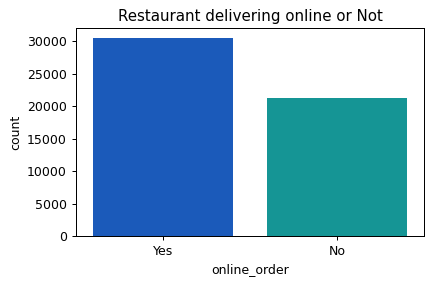

In [24]:
plt.figure(figsize=(5,3), dpi=90)
sns.countplot(x='online_order',data=data,palette='winter')
plt.title('Restaurant delivering online or Not')

Text(0.5, 1.0, 'Restaurant allowing table booking or not')

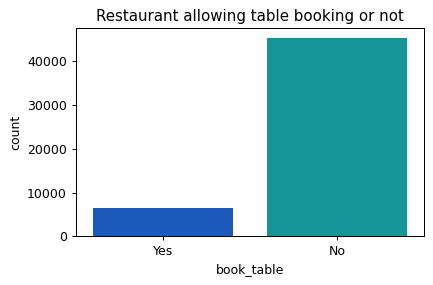

In [25]:
plt.figure(figsize=(5,3), dpi=90)
sns.countplot(x='book_table',data=data,palette='winter')
plt.title('Restaurant allowing table booking or not')

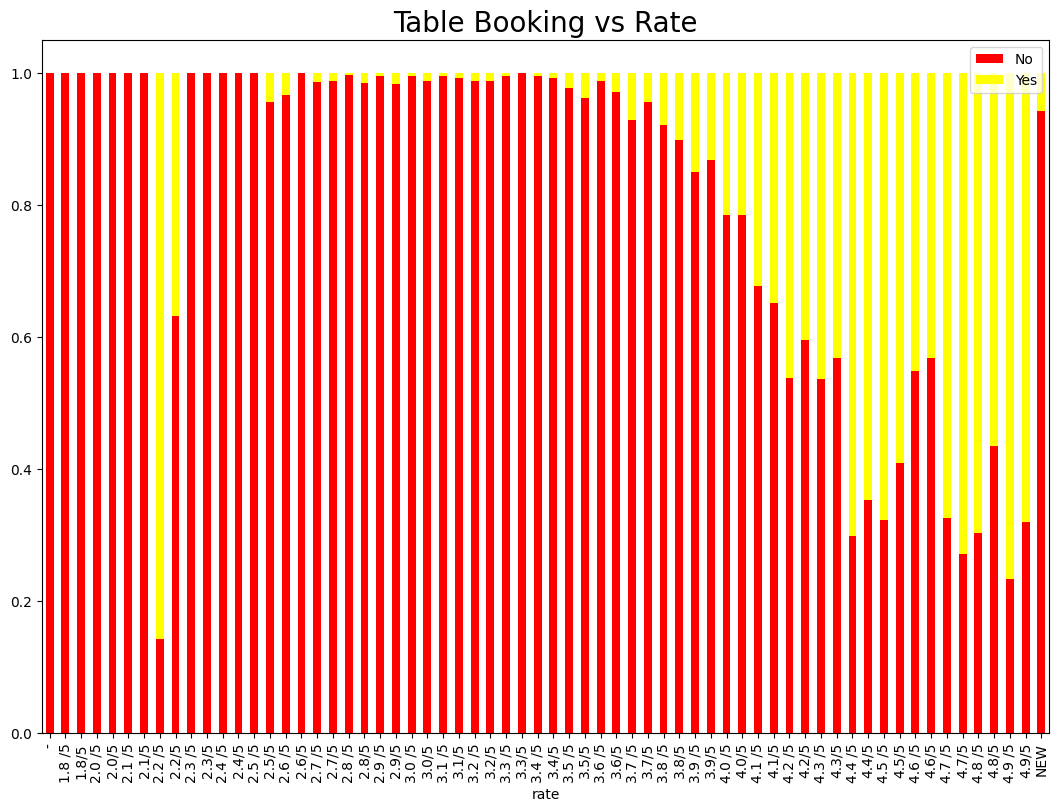

In [26]:
plt.rcParams['figure.figsize'] = (13, 9)
Y = pd.crosstab(data['rate'], data['book_table'])
Y_normalized = Y.div(Y.sum(1).astype(float), axis=0)
Y_normalized.plot(kind='bar', stacked=True, color=['red', 'yellow'])

plt.title('Table Booking vs Rate', fontweight=30, fontsize=20)
plt.legend(loc="upper right")
plt.savefig("Table_Booking_Rate.png")
plt.show()

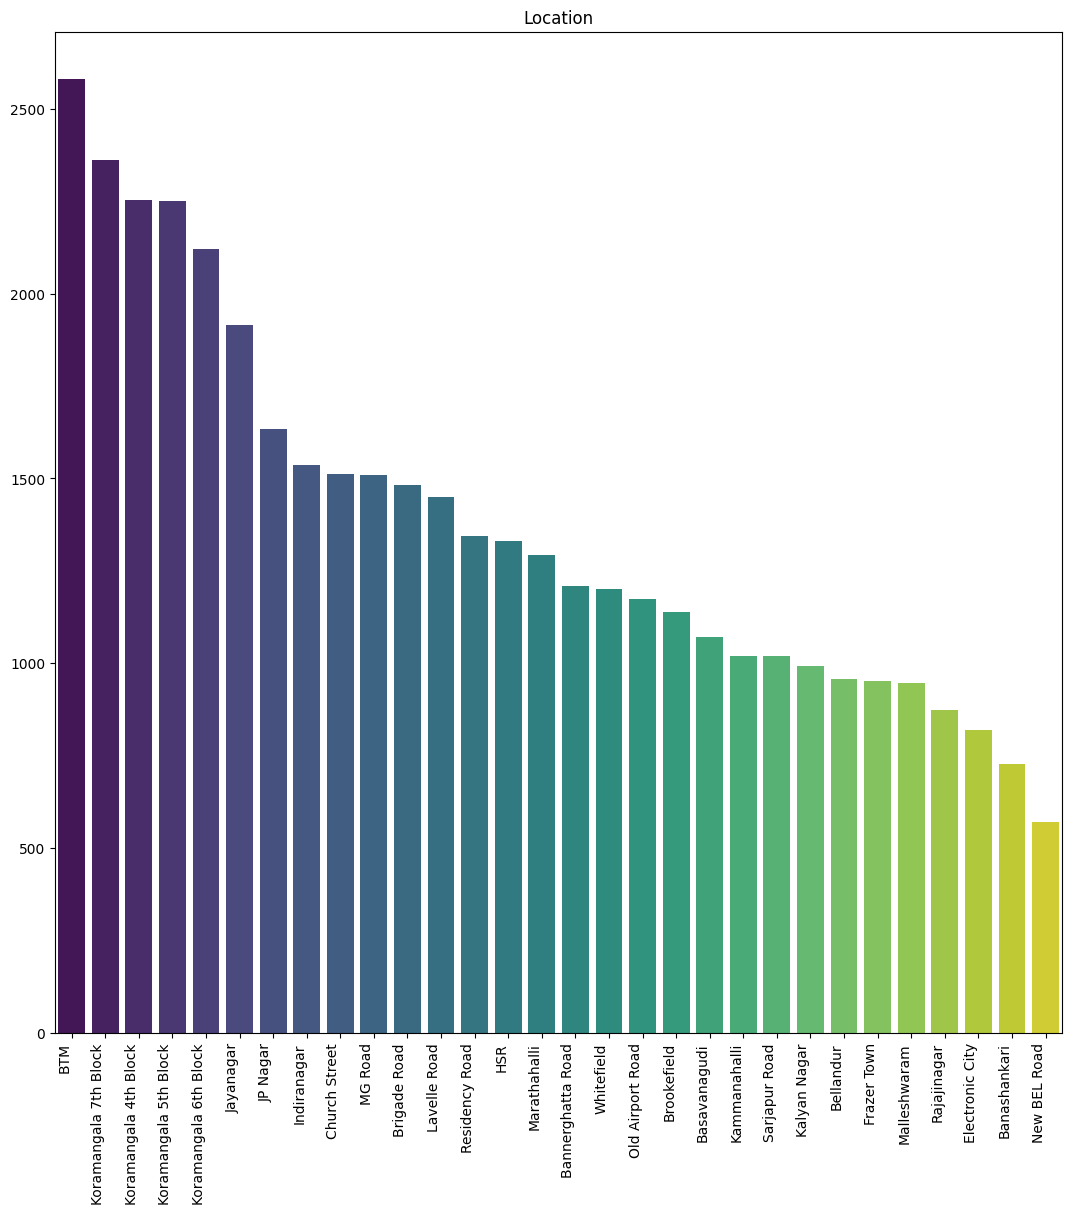

In [29]:
city_counts = mod_data['city'].value_counts()
plt.figure(figsize=(13, 13))
sns.barplot(x=city_counts.index, y=city_counts.values, palette="viridis")
plt.xticks(rotation=90, ha="right")
plt.title('Location')
plt.savefig("Location.png")
plt.show()

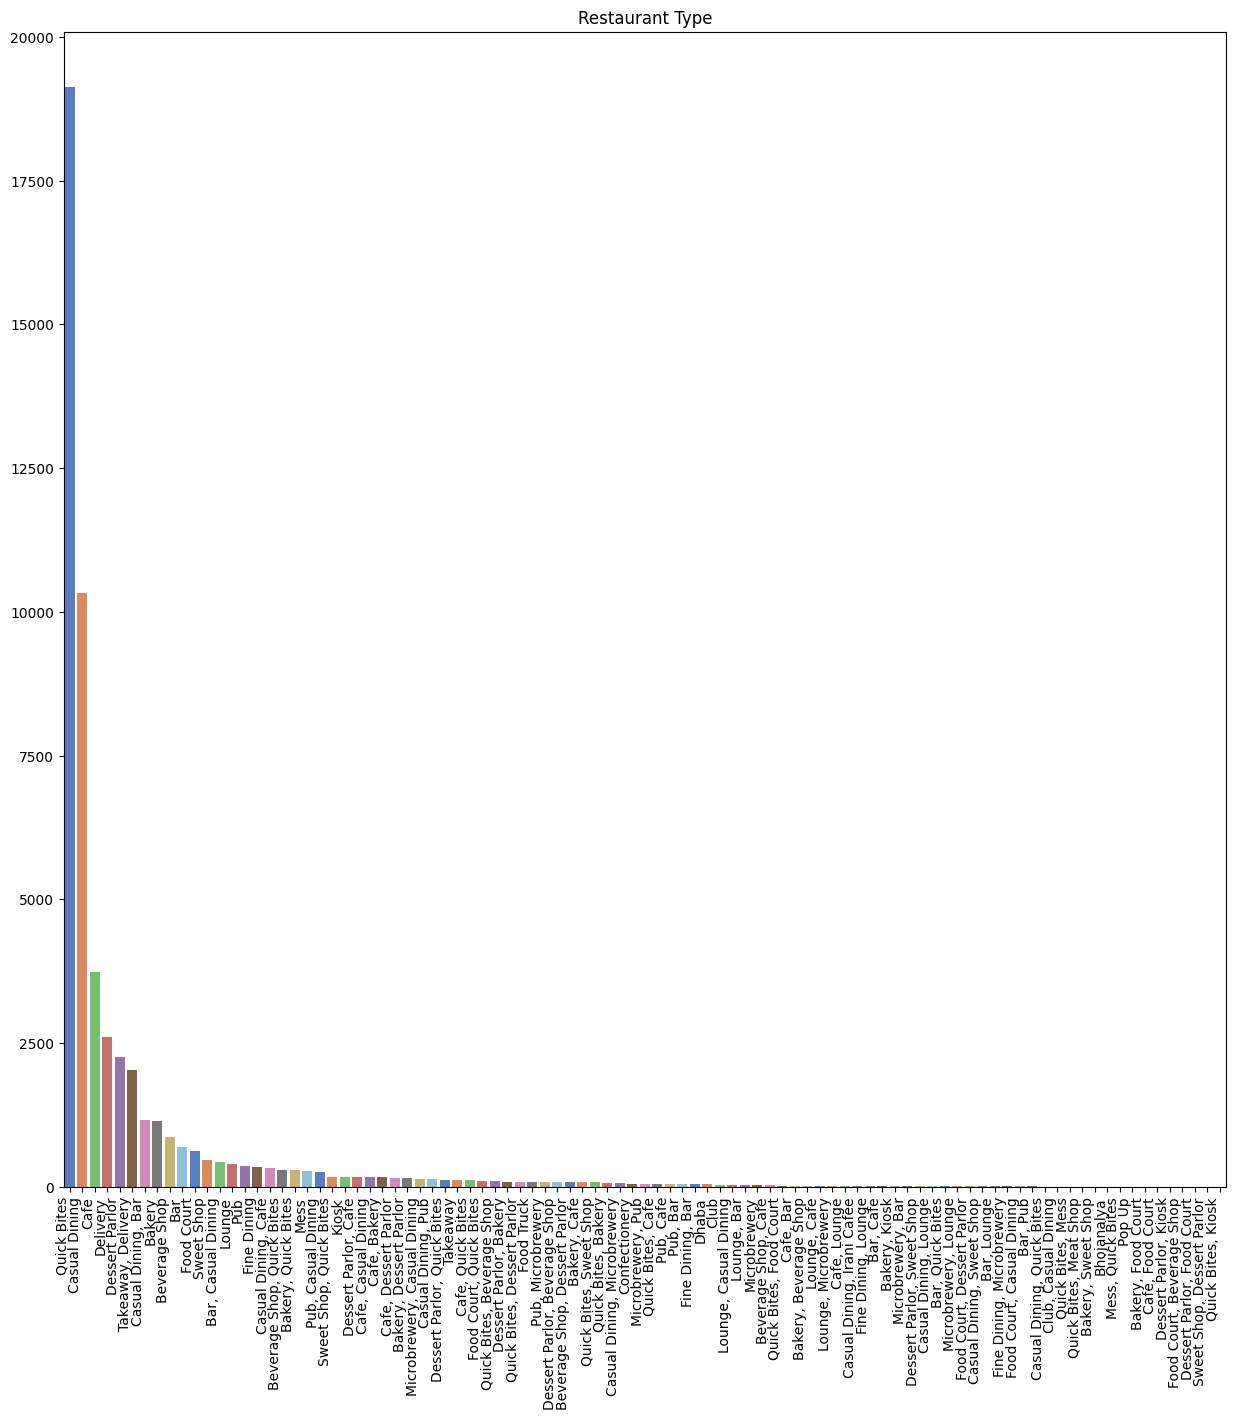

In [31]:
rest_type_counts = data['rest_type'].value_counts()
plt.figure(figsize=(15, 15))
sns.barplot(x=rest_type_counts.index, y=rest_type_counts.values, palette="muted")
plt.xticks(rotation=90, ha="right")
plt.title('Restaurant Type')
plt.savefig("Restaurant Type.png")
plt.show()

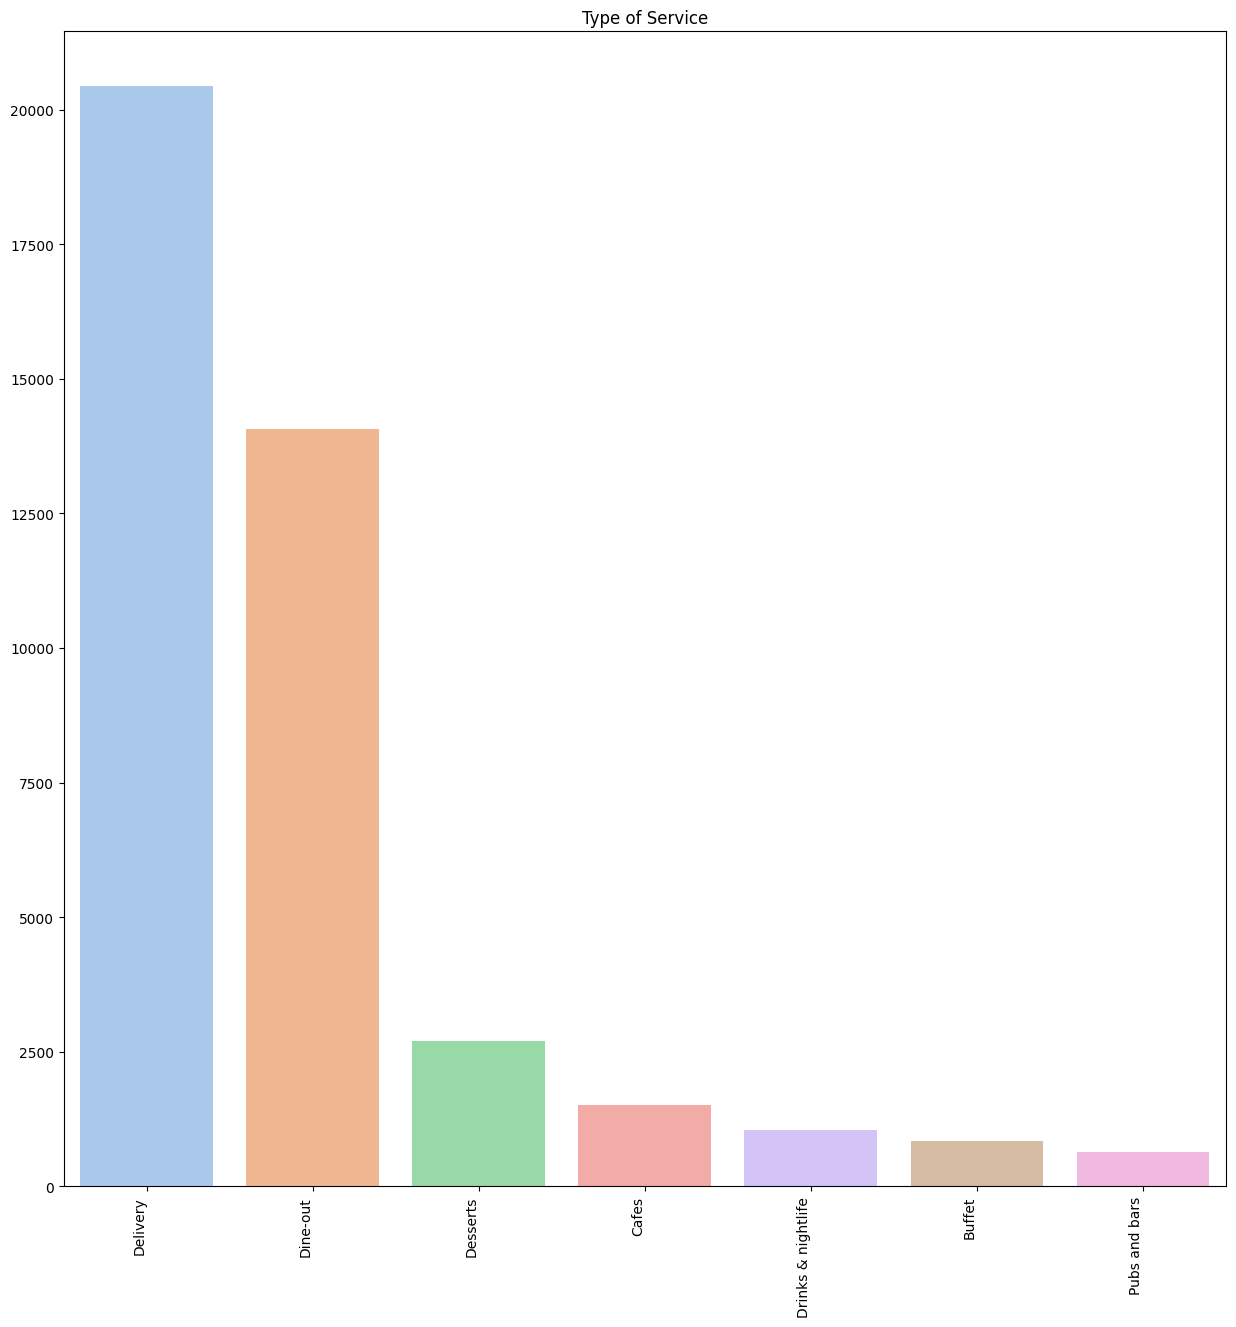

In [33]:
type_counts = mod_data['type'].value_counts()
plt.figure(figsize=(15, 15))
sns.barplot(x=type_counts.index, y=type_counts.values, palette="pastel")
plt.xticks(rotation=90, ha="right")
plt.title('Type of Service')
plt.savefig('Types of Service.png')
plt.show()

# *Text Preprocessing*


In [34]:
mod_data[['reviews_list', 'cuisines']].sample(5)

,reviews_list,cuisines
37044,"[('Rated 3.0', 'RATED\n One time eatables, th...","South Indian, North Indian, Chinese, Street Food"
41149,"[('Rated 1.0', 'RATED\n Food is not everythin...","Chinese, Momos"
17161,"[('Rated 3.0', 'RATED\n I expected for a neer...",Kerala
6024,"[('Rated 2.0', ""RATED\n I had tried so many M...","Chinese, Momos"
16775,"[('Rated 2.0', ""RATED\n Rarely do I give bad ...","Burger, Fast Food"


In [35]:
## Lower Casing
mod_data["reviews_list"] = mod_data["reviews_list"].str.lower()
mod_data[['reviews_list', 'cuisines']].sample(5)

,reviews_list,cuisines
588,"[('rated 2.0', ""rated\n hi,\nwe had masala pu...","South Indian, Chinese, North Indian"
22228,"[('rated 4.0', 'rated\n ""been a regular ice c...","Ice Cream, Desserts"
21491,"[('rated 3.0', 'rated\n paratha means a thin ...","Rajasthani, North Indian, Street Food"
17507,"[('rated 4.0', 'rated\n decent place with hea...","Healthy Food, Continental, Juices, Salad, Burg..."
16223,"[('rated 3.0', 'rated\n taste - 3.5/5\nservic...","Chinese, Thai, Momos"


In [36]:
## Removal of Puctuations
import string
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

mod_data["reviews_list"] = mod_data["reviews_list"].apply(lambda text: remove_punctuation(text))
mod_data[['reviews_list', 'cuisines']].sample(5)

,reviews_list,cuisines
23009,rated 40 ratedn a really good one for home fo...,"North Indian, Chinese"
34828,,Biryani
38339,rated 50 ratedn just bake cake is just awesom...,Bakery
37963,rated 10 ratedn please go here if you want to...,"North Indian, Biryani"
8765,rated 50 ratedn a pretty much spriteseedhi ba...,"North Indian, Mughlai, Biryani"


In [37]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [38]:
## Removal of Stopwords
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

mod_data["reviews_list"] = mod_data["reviews_list"].apply(lambda text: remove_stopwords(text))

In [39]:
## Removal of URLS
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

mod_data["reviews_list"] = mod_data["reviews_list"].apply(lambda text: remove_urls(text))

In [40]:
mod_data[['reviews_list', 'cuisines']].sample(5)

,reviews_list,cuisines
39454,rated 40 ratedn ordered chicken biryani chicke...,"North Indian, Chinese, Beverages"
11941,rated 40 ratedn one yummy food chain try manga...,"Seafood, Mangalorean, Chinese"
26182,rated 10 ratedn worest good eat proper cleanin...,"Biryani, North Indian"
39377,rated 50 ratedn best pocket friendly food good...,"North Indian, Chinese, Biryani"
10662,rated 40 ratedn spicy biriyani expected qualit...,"Andhra, Chinese, North Indian"


In [41]:
# RESTAURANT NAMES
restaurant_names = list(mod_data['name'].unique())
restaurant_names

['Jalsa',
 'Spice Elephant',
 'San Churro Cafe',
 'Addhuri Udupi Bhojana',
 'Grand Village',
 'Timepass Dinner',
 'Rosewood International Hotel - Bar & Restaurant',
 'Onesta',
 'Penthouse Cafe',
 'Smacznego',
 'Cafã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â© Down The Alley',
 'Cafe Shuffle',
 'The Coffee Shack',
 'Caf-Eleven',
 'Cafe Vivacity',
 'Catch-Up-Ino',
 "Kirthi'S Biryani",
 'T3H Cafe',
 '360 Atoms Restaurant And Cafe',
 'The Vintage Cafe',
 'Woodee Pizza',
 'Cafe Coffee Day',
 'My Tea House',
 'Hide Out Cafe',
 'Cafe Nova',
 'Coffee Tindi',
 'Sea Green Cafe',
 'Cuppa',
 "Srinathji'S Cafe",
 'Redberrys',
 'Foodiction',
 'Sweet Truth',
 'Ovenstory Pizza',
 'Faasos',
 'Behrouz Biryani',
 'Fast And Fresh',
 'Szechuan Dragon',
 'Empire Restaurant',
 'Maruthi Davangere Benne Dosa',
 'Chaatimes',
 'Havyaka Mess',
 "Mcdonald'S",
 "Domino'S Pizza",
 'Hotboxit',
 'Kitchen Garden',
 'Recipe',
 'Beijing Bites',
 'Tasty Bytes',
 'Petoo',
 'Shree Cool Point'

In [42]:
def get_top_words(column, top_nu_of_words, nu_of_word):
    vec = CountVectorizer(ngram_range= nu_of_word, stop_words='english')
    bag_of_words = vec.fit_transform(column)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:top_nu_of_words]

In [43]:
mod_data.sample(5)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city,Mean Rating
22788,"House 70, 13th cross, Venkatapura, Teachers Co...",Delhi Home Food,False,False,3.3,5,Koramangala 1st Block,Quick Bites,"North Indian, South Indian",200.0,rated 50 ratedn tasty food liked thali north i...,[],Dine-out,Koramangala 4th Block,2.94
27901,"Shop 1, 1st Floor, BTM Complex, 9th Main Road,...",Basmati Delights,True,False,4.0,870,BTM,Delivery,"Biryani, Chinese, Mughlai, Fast Food, Kebab",500.0,rated 40 ratedn time place stones throw away p...,[],Delivery,Koramangala 7th Block,3.84
9786,"25, Gover Road, Cox Town, Frazer Town, Bangalore",Marathi Biriyani House,True,False,3.3,6,Frazer Town,Quick Bites,"South Indian, Biryani",300.0,rated 40 ratedn happened come across nice biry...,[],Delivery,Church Street,2.94
579,"2/B J P Road, Girinagar I Phase, Banashankari,...",Simple Thindies,False,False,3.5,8,Banashankari,Quick Bites,South Indian,200.0,rated 30 ratedn fuss free economical breakfast...,[],Dine-out,Banashankari,3.19
25806,"132, 17th A Main, Koramangala 5th Block, Banga...",Beer Adda,True,True,4.3,549,Koramangala 5th Block,"Casual Dining, Pub","North Indian, Chinese, Pizza",1.0,rated 40 ratedn amazing place go chill friends...,"['Malai Chicken Tikka', 'Chicken Tiranga', 'Gh...",Delivery,Koramangala 6th Block,4.19


In [44]:
mod_data=mod_data.drop(['rest_type', 'type', 'menu_item', 'votes'],axis=1)

# Term Frequency and Inverse Document Frequency


In [45]:
df_percent = mod_data.sample(frac=0.5)

In [46]:
df_percent.set_index('name', inplace=True)

In [47]:
indices = pd.Series(df_percent.index)

In [48]:
# Creating tf-idf matrix
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_percent['reviews_list'])

In [49]:
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

In [50]:
def recommend(name, cosine_similarities = cosine_similarities):

    recommend_restaurant = [] #list of restaurnat
    idx = indices[indices == name].index[0] # the index of the hotel
    score_series = pd.Series(cosine_similarities[idx]).sort_values(ascending=False)
    top30_indexes = list(score_series.iloc[0:31].index) # Extract top 30 restaurant

    # Names of the top 30 restaurants
    for each in top30_indexes:
        recommend_restaurant.append(list(df_percent.index)[each])

    df_new = pd.DataFrame(columns=['cuisines', 'Mean Rating', 'cost'])

    for each in recommend_restaurant:
        df_new = df_new.append(pd.DataFrame(df_percent[['cuisines','Mean Rating', 'cost']][df_percent.index == each].sample()))

    # Drop the same named restaurants and sort only the top 10 by the highest rating
    df_new = df_new.drop_duplicates(subset=['cuisines','Mean Rating', 'cost'], keep=False)
    df_new = df_new.sort_values(by='Mean Rating', ascending=False).head(10)

    print('TOP %s RESTAURANTS LIKE %s WITH SIMILAR REVIEWS: ' % (str(len(df_new)), name))

    return df_new

In [51]:
mod_data[mod_data.index == 'Pai Vihar'].head()

,address,name,online_order,book_table,rate,location,cuisines,cost,reviews_list,city,Mean Rating


In [52]:
recommend('Pai Vihar')


TOP 10 RESTAURANTS LIKE Pai Vihar WITH SIMILAR REVIEWS: 


,cuisines,Mean Rating,cost
Burma Burma,"Asian, Burmese",4.74,1.5
Chianti,Italian,4.59,1.5
Bologna,Italian,4.48,1.0
Lavonne,"Cafe, Desserts",4.35,800.0
Foxtrot - House Of Subculture,"Cafe, American, Asian, North Indian",4.35,1.0
The Lantern Restaurant & Bar - The Ritz-Carlton...,Chinese,4.28,3.5
Little Green Cafe,"Cafe, Healthy Food, Salad, Continental, Bevera...",4.23,900.0
Hotel Tom'S Restaurant,"Mangalorean, Seafood, Chinese, North Indian",4.15,1.0
Marzipan Cafe & Bakery,"Cafe, Mediterranean, Bakery, Greek",4.10,700.0
Dum Biryani Hub,Biryani,3.71,700.0
